# Creating a train, validation and test split with even distribution of scans with features of interesting

### Split split focuses on the following features

- 4: sub retinal fluid
- 5: sub retainal hyper reflective material
- 7: fibrovascular PED
- 8: drusen
- 9: poster hyloid membrane detachment
- 10: choroid
- 13: fibrosis

In [3]:
import os
import numpy as np
import pandas as pd
import sklearn
import cv2
from tqdm import tqdm

FEATURES_OI = [4, 5, 7, 8, 9, 10, 13]

WORK_SPACE = "/home/olle/PycharmProjects/LODE/workspace"
LBL_PATH = "feature_segmentation/segmentation/data/train_data/hq_examples/masks"

MASK_DIR = os.path.join(WORK_SPACE, LBL_PATH)

#### load all labels

In [74]:
label_names = os.listdir(MASK_DIR)

labels = {}
for label_name in label_names:
    label_path = os.path.join(MASK_DIR, label_name)
    label = cv2.imread(label_path)
    labels[label_name] = label

#### create dict with record feature distribution

In [75]:
feature_record_dist = {1:[], 2:[], 3:[], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 13: []}
for feature in [1,2,3,4,5,6,7,8,9,10, 13]:
    print("Loogging feature: ", feature)
    for label_name in tqdm(labels.keys()):
        if feature in labels[label_name]:
            feature_record_dist[feature].append(label_name)

  0%|          | 0/592 [00:00<?, ?it/s]

Loogging feature:  1
Loogging feature:  2
Loogging feature:  3
Loogging feature:  4


  0%|          | 0/592 [00:00<?, ?it/s]

Loogging feature:  5
Loogging feature:  6
Loogging feature:  7


  0%|          | 0/592 [00:00<?, ?it/s]

Loogging feature:  8
Loogging feature:  9
Loogging feature:  10


100%|██████████| 592/592 [00:00<00:00, 8382.49it/s]

Loogging feature:  13


In [76]:
for feature in [1,2,3,4,5,6,7,8,9,10, 13]:
    print(f"Number of samples in feature {feature} is {len(feature_record_dist[feature])}")

Number of samples in feature 1 is 294
Number of samples in feature 2 is 592
Number of samples in feature 3 is 165
Number of samples in feature 4 is 98
Number of samples in feature 5 is 66
Number of samples in feature 6 is 557
Number of samples in feature 7 is 178
Number of samples in feature 8 is 120
Number of samples in feature 9 is 126
Number of samples in feature 10 is 362
Number of samples in feature 13 is 84


In [77]:
#### data distribution plot

/home/olle/miniconda3/envs/DeepRT/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'class distribution')

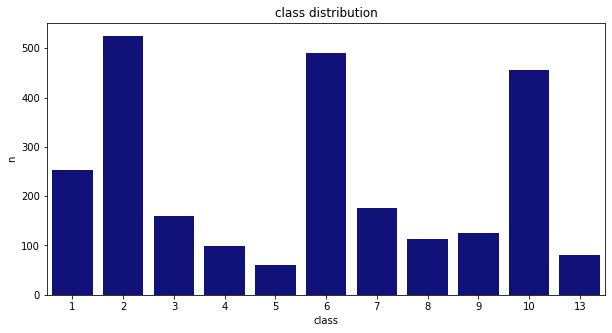

In [78]:
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

ious = [254, 525, 159, 98, 60, 491, 176, 114, 126, 456, 80]

classes = [1,2,3,4,5,6,7,8,9,10, 13]

plt.figure(figsize=(10,5))
sns.barplot(classes, ious, color="darkblue")
plt.xlabel("class")
plt.ylabel("n")
plt.title("class distribution")

In [79]:
test_records = []
validation_records = []
record_names = list(labels.keys())

In [80]:
n_srf_test = 0
n_srhm_test = 0
n_drusen_test = 0
n_fibrosis_test = 0
n_phmd_test = 0 
n_not_choroid_test = 0
n_irf_test = 0
n_em_test = 0 
n_fvped_test = 0

n_from_class = 8
test_records = []
print("Number of available records before test data:", len(record_names))
for label_name in record_names:
    if not "oct_" in label_name:
        lbl = labels[label_name]

        if n_fvped_test < n_from_class:
            if 7 in lbl:
                n_fvped_test += 1
                test_records.append(label_name)
                record_names.remove(label_name)
                continue

        if n_em_test < n_from_class:
            if 1 in lbl:
                n_em_test += 1
                test_records.append(label_name)
                record_names.remove(label_name)
                continue

        if n_srf_test < n_from_class:
            if 4 in lbl:
                n_srf_test += 1
                test_records.append(label_name)
                record_names.remove(label_name)
                continue

        if n_srhm_test < n_from_class:
            if 5 in lbl:
                n_srhm_test += 1
                test_records.append(label_name)
                record_names.remove(label_name)
                continue

        if n_drusen_test < n_from_class:
            if 8 in lbl:
                n_drusen_test += 1
                test_records.append(label_name)
                record_names.remove(label_name)
                continue

        if n_fibrosis_test < n_from_class:
            if 13 in lbl:
                print(13)
                n_fibrosis_test += 1
                test_records.append(label_name)
                record_names.remove(label_name)
                continue

        if n_phmd_test < n_from_class:
            if 9 in lbl:
                n_phmd_test += 1
                test_records.append(label_name)
                record_names.remove(label_name)
                continue

        if n_not_choroid_test < n_from_class:
            if 10 not in lbl:
                n_not_choroid_test += 1
                test_records.append(label_name)
                record_names.remove(label_name)
                continue

        if n_irf_test < n_from_class:
            if 3 in lbl:
                n_irf_test += 1
                test_records.append(label_name)
                record_names.remove(label_name)
                continue

print("Number of available records after test data:", len(record_names))

Number of available records before test data: 592
13
13
13
13
13
13
13
13
Number of available records after test data: 520


In [36]:
n_srf_validation = 0
n_srhm_validation = 0
n_drusen_validation = 0
n_fibrosis_validation = 0
n_phmd_validation = 0 
n_not_choroid_validation = 0
n_irf_validation = 0 
n_em_validation = 0
n_fvped_validation = 0 

validation_records = []
print("Number of available records before test data:", len(record_names))
for label_name in record_names:
    lbl = labels[label_name]
    
    if n_fvped_validation < 5:
        if 7 in lbl:
            print(7)
            n_fvped_validation += 1
            validation_records.append(label_name)
            record_names.remove(label_name)
            continue
    
    if n_srf_validation < 5:
        if 4 in lbl:
            print(4)
            n_srf_validation += 1
            validation_records.append(label_name)
            record_names.remove(label_name)
            continue
    
    if n_srhm_validation < 5:
        if 5 in lbl:
            print(5)
            n_srhm_validation += 1
            validation_records.append(label_name)
            record_names.remove(label_name)
            continue
    
    if n_drusen_validation < 5:
        if 8 in lbl:
            print(8)
            n_drusen_validation += 1
            validation_records.append(label_name)
            record_names.remove(label_name)
            continue

    if n_fibrosis_validation < 5:
        if 13 in lbl:
            print(13)
            n_fibrosis_validation += 1
            validation_records.append(label_name)
            record_names.remove(label_name)
            continue
                
    if n_phmd_validation < 5:
        if 9 in lbl:
            print(9)
            n_phmd_validation += 1
            validation_records.append(label_name)
            record_names.remove(label_name)
            continue
    
    if n_not_choroid_validation < 5:
        if 10 not in lbl:
            print("not", 10)
            n_not_choroid_validation += 1
            validation_records.append(label_name)
            record_names.remove(label_name)
            continue
            
    if n_irf_validation < 5:
        if 3 in lbl:
            print(3)
            n_irf_validation += 1
            validation_records.append(label_name)
            record_names.remove(label_name)
            continue
    
    if n_em_validation < 5:
        if 1 in lbl:
            print(1)
            n_em_validation += 1
            validation_records.append(label_name)
            record_names.remove(label_name)
            continue
            
            
print("Number of available records after test data:", len(record_names))

Number of available records before test data: 439
13
7
8
not 10
8
4
not 10
1
not 10
8
8
7
4
7
1
7
13
9
7
9
9
4
5
13
4
8
4
1
not 10
not 10
3
1
1
3
5
9
9
3
13
3
3
13
5
5
5
Number of available records after test data: 394


## verify data split distribution

In [81]:
print(f"number of train records: {len(record_names)}, \
      number validation records: {len(validation_records)}, \
      number of test records: {len(test_records)}")

number of train records: 520,       number validation records: 0,       number of test records: 72


In [68]:
# test so no records overlap
print([record for record in record_names if record in validation_records])
print([record for record in record_names if record in test_records])
print([record for record in validation_records if record in test_records])

[]
[]
[]


In [82]:
save_dir = "feature_segmentation/segmentation/data/train_data/data_split"

test_save_path = os.path.join(WORK_SPACE, save_dir, "test_ids.csv")
train_save_path = os.path.join(WORK_SPACE, save_dir, "train_ids.csv")
validation_save_path = os.path.join(WORK_SPACE, save_dir, "validation_ids.csv")

pd.DataFrame(test_records).to_csv(test_save_path)
pd.DataFrame(validation_records).to_csv(validation_save_path)
pd.DataFrame(record_names).to_csv(train_save_path)

In [83]:
#### visualize data split

import shutil

overview_path = "feature_segmentation/segmentation/data/train_data/hq_examples/overview"

os.makedirs(os.path.join(WORK_SPACE, save_dir, "train_overview"), exist_ok=True)
os.makedirs(os.path.join(WORK_SPACE, save_dir, "test_overview"), exist_ok=True)
os.makedirs(os.path.join(WORK_SPACE, save_dir, "validation_overview"), exist_ok=True)

for record in record_names:
    shutil.copy(os.path.join(WORK_SPACE, overview_path, record), 
               os.path.join(WORK_SPACE, save_dir, "train_overview"))
    

for record in test_records:
    shutil.copy(os.path.join(WORK_SPACE, overview_path, record), 
               os.path.join(WORK_SPACE, save_dir, "test_overview"))
    

for record in validation_records:
    shutil.copy(os.path.join(WORK_SPACE, overview_path, record), 
               os.path.join(WORK_SPACE, save_dir, "validation_overview"))

## Data split curated by me

In [403]:
'''Data samples for removing and testing'''

# test samples
test_dict = {"fibrosis": ["1745", "22757", "24844", "47557", "48212", "64530", "273218"],
            "srhm":["13130", "45526", "196106"],
            "fv_pred":["4206", "5091", "7561","47407","48221"],
            "drusen":["295655", "319355", "2106", "42510", "43106", "86737", "160803"],
            "srf":["240948", "338917"],
            "irf": ["61989", "135590", "333295"],
            "phm": ["354106"],
            "erm": ["9637"], 
            "normal": ["36093", "290173", "41172", "76510", "90356", "272050"]}

to_remove = ["356065", "370411", "256773", "367861",
             "35013", "58253","169093","18780", "224732","245835","347778", 
             "213583", "252332","299680", 
             "322043","332319","347443",
             "351500","22475","36626",
             "61858", "73008","130380",
             "130492","158985", "196084",
             "253081", "262571","289786",
             "289948","302111", "303150",
             "307848","312696","329862",
             "345182","347851", "348456",
             "348706", "350899","352115","366746",
             "368378","368570","369769","370803",
            "12956", "61322", "266702", "16500", "78057",
            "290630", "38217", "46780", "92986", "297087", "343177",
            "54017", "176808", "306704", "226215", "317244", "57052", "259225", "333069",
            "48478", "222071", "94783", "273564", "183611"]

insecure_records = ["20844", "305355", "301630", "282167", "33676", "51217", "51640", "64565", "151221",
                   "1475"]

to_remove = to_remove + insecure_records
save_dir = "feature_segmentation/segmentation/data/train_data/agreement_data_split"


# load csv files
test_save_path = os.path.join(WORK_SPACE, save_dir, "test_ids.csv")
train_save_path = os.path.join(WORK_SPACE, save_dir, "train_ids.csv")
validation_save_path = os.path.join(WORK_SPACE, save_dir, "validation_ids.csv")

test_ids = pd.read_csv(test_save_path)["0"].tolist()
train_ids = pd.read_csv(train_save_path)["0"].tolist()
validation_ids = pd.read_csv(validation_save_path)["0"].tolist()

all_ids = test_ids + validation_ids + train_ids
all_ids_pd = pd.DataFrame(all_ids).drop_duplicates()

all_ids_pd["id"] = all_ids_pd[0].str.split("_", expand=True)[0]

# get all test records
test_records = []
for feature in test_dict.keys():
    test_records = test_records + test_dict[feature]
    
print("Number of records in test list: ", len(test_records), 
      "in filter: ", sum(all_ids_pd["id"].isin(test_records)))

test_records_bool = all_ids_pd["id"].isin(test_records)

print("Number of records in remove list: ", len(to_remove), 
      "in filter: ", sum(all_ids_pd["id"].isin(to_remove)))
    
remove_records_bool = all_ids_pd["id"].isin(to_remove)

print("Number of records in oct_ list: in filter: ", sum(all_ids_pd["id"].isin(["oct"])))

oct_remove_bool = all_ids_pd["id"].isin(["oct"])

# assign split columns
all_ids_pd["split"] = "train"
all_ids_pd[test_records_bool]["split"] = "test"

Number of records in test list:  35 in filter:  36
Number of records in remove list:  80 in filter:  82
Number of records in oct_ list: in filter:  49


/home/olle/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### set test split

In [404]:
all_ids_pd.loc[test_records_bool, "split"] = "test"

### remove lq records

In [405]:
all_ids_pd = all_ids_pd.loc[~(remove_records_bool | oct_remove_bool),:]
all_ids_pd = all_ids_pd.reset_index()#.drop(columns=["index"])

### split train / validation records

In [406]:
train_ids_pd = all_ids_pd[all_ids_pd.split == "train"].sample(frac=1.0)

validation_ids = train_ids_pd[0:int(train_ids_pd.shape[0]*0.2)]
train_ids = train_ids_pd[int(train_ids_pd.shape[0]*0.2):]

test_ids = all_ids_pd[all_ids_pd.split == "test"]

In [407]:
test_ids.shape, train_ids.shape, validation_ids.shape

((36, 4), (339, 4), (84, 4))

### save files

In [408]:
save_dir = "feature_segmentation/segmentation/data/train_data/curated_data_split"

test_ids[[0]].to_csv(os.path.join(WORK_SPACE, save_dir, "test_ids.csv"))
train_ids[[0]].to_csv(os.path.join(WORK_SPACE, save_dir, "train_ids.csv"))
validation_ids[[0]].to_csv(os.path.join(WORK_SPACE, save_dir, "validation_ids.csv"))

### move overview files

In [409]:
#### visualize data split
import shutil

overview_path = "feature_segmentation/segmentation/data/train_data/hq_examples/overview"

os.makedirs(os.path.join(WORK_SPACE, save_dir, "train_overview"), exist_ok=True)
os.makedirs(os.path.join(WORK_SPACE, save_dir, "test_overview"), exist_ok=True)
os.makedirs(os.path.join(WORK_SPACE, save_dir, "validation_overview"), exist_ok=True)

for record in train_ids[0].values.tolist():
    shutil.copy(os.path.join(WORK_SPACE, overview_path, record), 
               os.path.join(WORK_SPACE, save_dir, "train_overview"))
    

for record in test_ids[0].values.tolist():
    shutil.copy(os.path.join(WORK_SPACE, overview_path, record), 
               os.path.join(WORK_SPACE, save_dir, "test_overview"))
    

for record in validation_ids[0].values.tolist():
    shutil.copy(os.path.join(WORK_SPACE, overview_path, record), 
               os.path.join(WORK_SPACE, save_dir, "validation_overview"))